# Проект: Исследовательский анализ данных
## Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.\
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Описание данных

`total_images` — число фотографий квартиры в объявлении \
`last_price` — цена на момент снятия с публикации \
`total_area` — общая площадь квартиры в квадратных метрах (м²) \
`first_day_exposition` — дата публикации \
`rooms` — число комнат \
`ceiling_height` — высота потолков (м) \
`floors_total` — всего этажей в доме (float64) \
`living_area` — жилая площадь в квадратных метрах (м²) \
`floor` — этаж \
`is_apartment` — апартаменты \
`studio` — квартира-студия \
`open_plan` — свободная планировка \
`kitchen_area` — площадь кухни в квадратных метрах (м²) \
`balcony` — число балконов \
`locality_name` — название населённого пункта \
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) \
`cityCenters_nearest` — расстояние до центра города (м) \
`parks_around3000` — число парков в радиусе 3 км \
`parks_nearest` — расстояние до ближайшего парка (м) \
`ponds_around3000` — число водоёмов в радиусе 3 км \
`ponds_nearest` — расстояние до ближайшего водоёма (м) \
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

Прежде чем приступать к анализу, мы рассмотрим датасет в целом и по столбцам, приведём данные к оптимальноым для анализа типам, очистим данные от аномальных значений и выбросов, чтобы получить актуальные и достоверные результаты.
Далее, после предобработки, мы займемся исследованием данных и детальным изучением рынка жилой недвижимости Санкт-Петербурга.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import matplotlib

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

# Шаг 1. Описание данных
total_images — число фотографий квартиры в объявлении (int64)\
last_price — цена на момент снятия с публикации (float64)\
total_area — общая площадь квартиры в квадратных метрах (м²) (float64)\
<span style="color:red"> first_day_exposition — дата публикации (object) — нужно сменить на datetime </span>\
rooms — число комнат (int64)\
<span style="color:orange">ceiling_height — высота потолков (м) (float64) — есть пропуски </span>\
<span style="color:red"> floors_total — всего этажей в доме (float64) — нужно привести к int64, обработать пропуски</span>\
<span style="color:orange">living_area — жилая площадь в квадратных метрах (м²) (float64) — есть пропуски </span>\
floor — этаж (int64)\
<span style="color:red"> is_apartment — апартаменты (object) — привести к bool, обработать пропуски </span>\
studio — квартира-студия (bool)\
open_plan — свободная планировка (bool)\
<span style="color:orange"> kitchen_area — площадь кухни в квадратных метрах (м²) (float64) — есть пропуски </span>\
<span style="color:red"> balcony — число балконов (float64) — нужно привести к int64, обработать пропуски</span>\
<span style="color:orange"> locality_name — название населённого пункта (object) — есть пропуски </span>\
<span style="color:orange"> airports_nearest — расстояние до ближайшего аэропорта в метрах (м) (float64) — есть пропуски </span>\
<span style="color:orange"> cityCenters_nearest — расстояние до центра города (м) (float64) — есть пропуски </span>\
<span style="color:red"> parks_around3000 — число парков в радиусе 3 км (float64) — нужно привести к int64, обработать пропуски</span>\
<span style="color:orange"> parks_nearest — расстояние до ближайшего парка (м) (float64) — есть пропуски </span>\
<span style="color:red"> ponds_around3000 — число водоёмов в радиусе 3 км (float64) — нужно привести к int64, есть пропуски</span>\
<span style="color:orange"> ponds_nearest — расстояние до ближайшего водоёма (м) — есть пропуски(float64)\
<span style="color:red"> days_exposition — сколько дней было размещено объявление (от публикации до снятия) (float64) — нужно привести к int64, есть пропуски</span>

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


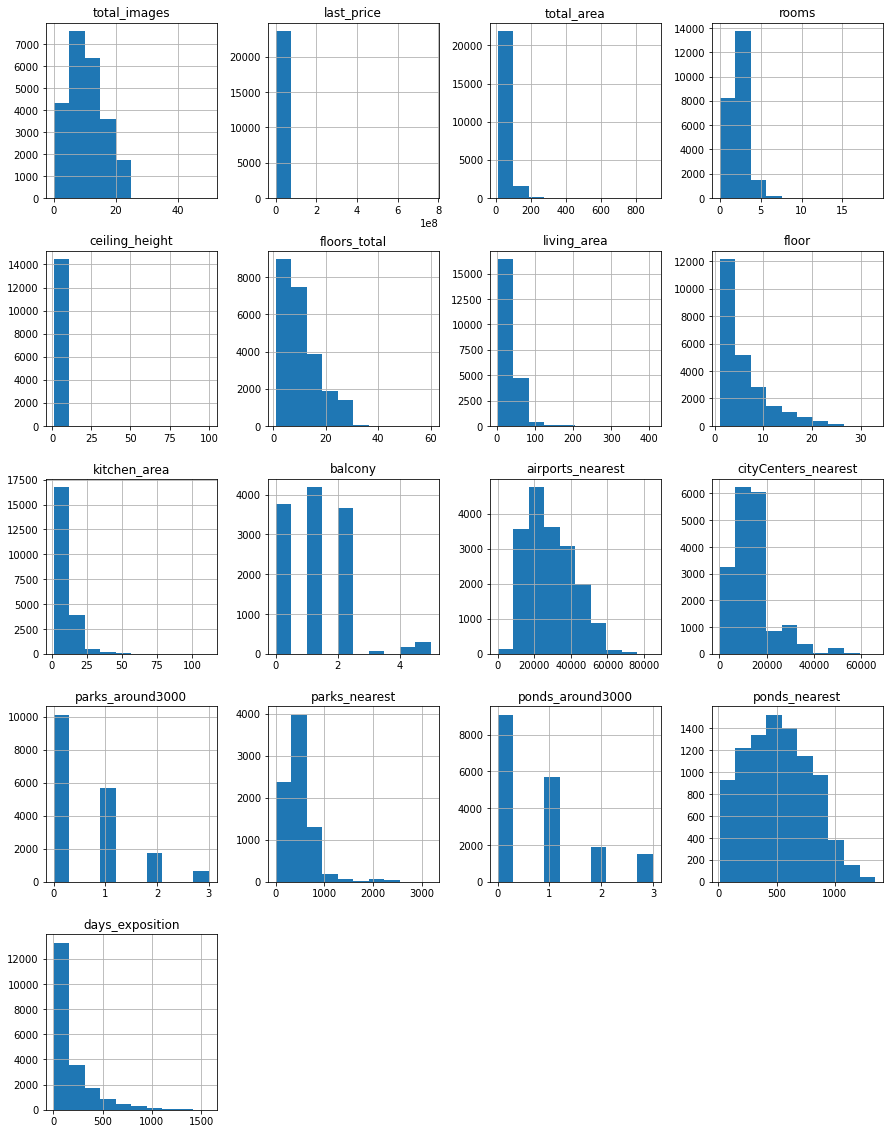

In [4]:
data.hist(figsize=(15, 20))
None

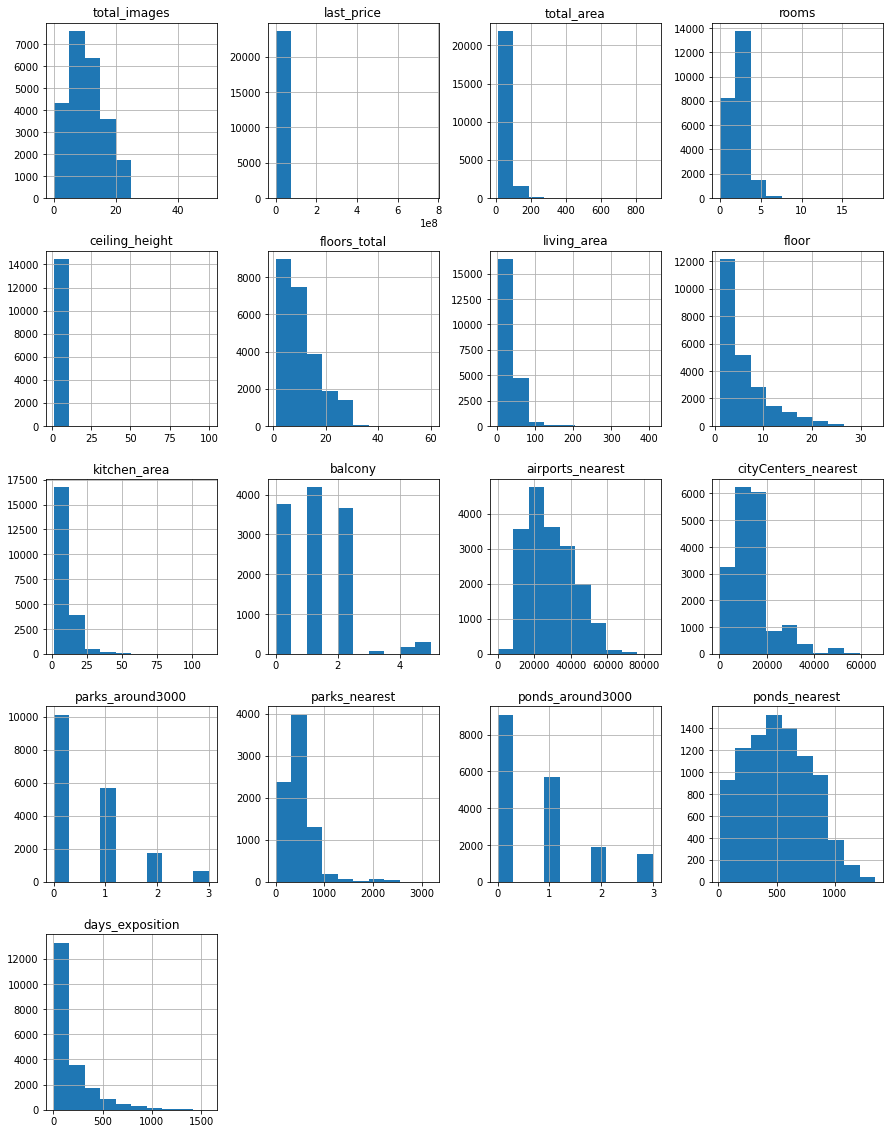

In [5]:
# Код ревьюера

data.hist(figsize=(15, 20))
None

# Шаг 2. Предобработка данных

In [6]:
data.duplicated().sum() #проверим датафрейм на наличие дублированных строк

0

Явных дубликатов на данный момент нет.

In [7]:
data.isna().sum() #изучим пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
(data.isna().sum() / len(data)).round(4) * 100 #для наглядности подсчитаем процент пропусков

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

In [9]:
data['last_price'] = data['last_price'].astype('int64') #при продаже квартир редко оперируют копейками, приведем к целочисленному типу.

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

Пойдем по списку, проверяя каждый столбец на аномальные значения и обрабатывая пропуски, если это возможно

In [11]:
data['ceiling_height'].sort_values().unique() #посмотрим, какие варианты высоты потолков есть в датафрейме, отсортировав по возрастанию для удобства

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Согласно СНиП, высота потолков в жилых помещениях должна быть не менее 2,5 м. Оставим значения до 2,4 м на случай разных вариантов отделки, которые могут уменьшить высоту потолка (вариации подвесных/натяжных потолков и напольных покрытий).
Поскольку датафрейм содержит информацию о квартирах в Санкт-Петербурге и близлежащих районах, где есть так называемый "старый фонд", высокие потолки начинают смущать только когда значение высоты превышает 4,5 м.\
При этом у нас есть пул значений в диапазоне 20-32, которые появились, возможно, из-за пропущенной точки при вводе данных пользователями.

<AxesSubplot:ylabel='Frequency'>

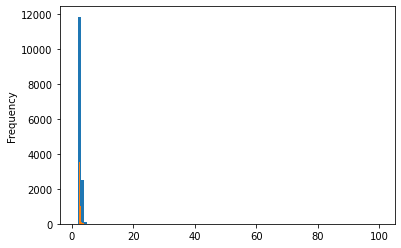

In [12]:
data['ceiling_height'].sort_values().plot(x = 'ceiling_height', kind = 'hist', bins = 100, range=(1,100)) #посмотрим на гистограмму со всеми значениями
data['ceiling_height'].sort_values().plot(x = 'ceiling_height', kind = 'hist', bins = 100, range=(1,5)) #посмотрим на более реалистичный диапазон значений

С таким масштабом трудно что-либо оценить, кроме того, что экстремальные значения практически не встречаются, а основная масса значений сконцентрирована в адекватном диапазоне значений.\
Посмотрим ближе.

<AxesSubplot:ylabel='Frequency'>

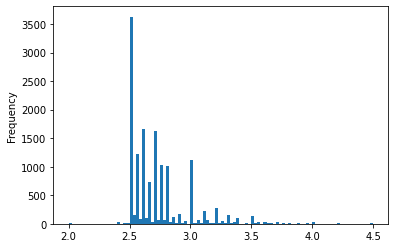

In [13]:
data['ceiling_height'].sort_values().plot(x = 'ceiling_height', kind = 'hist', bins = 100, range=(2, 4.5)) 

И правда, видим, что основная масса значений расположена в диапазоне от 2,5 до 3,5 м.

In [14]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10 #приведем в порядок значения с возможными опечатками

In [15]:
data['ceiling_height'].sort_values().unique() #стало лучше, но еще нужно обработать экстремальные значения

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

In [16]:
# data = data.loc[(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 4.5)] #вариант радикальной очистки датасета
data['ceiling_height'] = data['ceiling_height'].fillna(0) #сменили NaN на 0
data.loc[data['ceiling_height'] > 4.5, 'ceiling_height'] = 4.5 #привели все высокие потолки к одному реалистичному значению
data['ceiling_height'] = round(data['ceiling_height'], 1) 

В столбце с высотой потолков у нас было 38,8% пропусков значений — это весомая доля. На данном этапе восстановить эти данные мы не имеем возможности, удалить эти строки мы тоже не можем — другая информация в них может иметь значение для исследования, поэтому заменим NaN на 0.\
Также мы обработаем аномальные значения с нереалистично высокими потолками, сведя их к 4,5м.\
Также округлим значения столбца до одного знака после запятой, б*о*льшая точность не играет никакой роли в вопросе высоты потолков.

Посмотрим, сколько значений мы отсекли.

In [18]:
low_percentele = 0.01
high_percentele = 0.99

ceiling_height_low = data['ceiling_height'].quantile(low_percentele)
ceiling_height_high = data['ceiling_height'].quantile(high_percentele)

print(f'Нижняя граница ceiling_height {ceiling_height_low}')
print(f'Верхняя граница ceiling_height {ceiling_height_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@ceiling_height_low <= ceiling_height <= @ceiling_height_high'))
        / len(data['ceiling_height']) * 100,
        2
    ),
    '%'
)

Нижняя граница ceiling_height 0.0
Верхняя граница ceiling_height 3.6
Процент отброшенных значений =  0.82 %


count    23699.000000
mean         1.671273
std          1.348297
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64

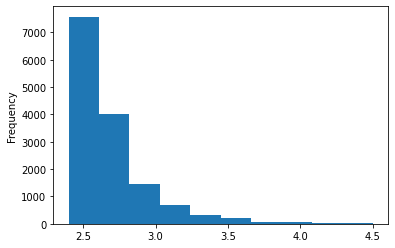

In [19]:
data['ceiling_height'].plot(kind='hist', range=(2.4,4.5))
data['ceiling_height'].describe()

Визуализируем, ограничив диапазон значений до реалистичных (выше мы указали, что реалистичная минимальная высота потолков это 2,4 м, а максимальная — 4,5м). Гистограмма выглядит как распределение Пуассона.\
Медиана составляет 2,5 м.

In [20]:
data['floors_total'].sort_values().unique() # по аналогии, посмотрим, какие есть значения этажей

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

Возвращаемся к тому, что это данные о Санкт-Петербурге, где самое высокое жилое здание имеет 37 этажей.\
Также, как и при обработке высоты потолков, мы не можем заменить пропуски какими-либо значениями.\
В отличие от высоты потолков, этажи — целочисленные значения, поэтому делением на десять мы мало что получим.

<AxesSubplot:ylabel='Frequency'>

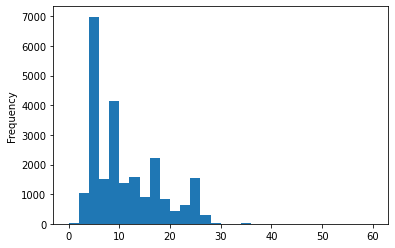

In [21]:
data['floors_total'].sort_values().plot(x = 'floors_total', kind = 'hist', bins = 30, range=(0, 60)) 

Видим, что в основном этажи распределены между 1 и 30. Но мы помним про самое высокое жилое здание в 37 этажей.

In [22]:
data = data.loc[(data['floors_total'] >= 1) & (data['floors_total'] <= 36)] #убрали строки с экстремальными значениями и пропусками
data['floors_total'] = data['floors_total'].astype('int64') #привели к целочисленному виду

In [23]:
data['living_area'].isna().sum()

1870

In [24]:
data['living_area'].value_counts() 
data['living_area'].describe()

count    21740.000000
mean        34.464993
std         22.037998
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

В столбце с жилой площадью кроме пропусков видим нереалистичные значения. По аналогии с высотой потолков действовать не получится, так как мы не можем знать, на сколько умножать, допустим, 2 кв.м.: могут быть как квартиры с 20 кв.м., так и с 200 кв.м. жилой площади.\
Заполнять пропуски медианой/средним — неподходящая тактика для таких данных.

<AxesSubplot:>

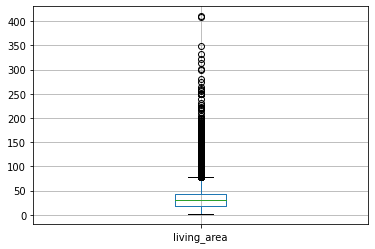

In [25]:
data.boxplot(column=['living_area'])

Основная масса значений сконцентрирована в диапазоне 18,6-42,3 кв.м., при этом у нас есть много выбросов выше 42,3. Однако мы имеем дело с квартирами, и варианты квартир с большой площадью могут иметь место: если вернуться к гистограммам по исходным данным, мы увидим, что есть квартиры с большим количеством комнат (5 и более), и для таких квартир большая жилая площадь это
абсолютно нормально.\
Минимальная жилая площадь, согласно СНиП, не менее 8 кв.м. на человека. Но есть нюанс: квартиры могут продаваться и с нарушениями СНиП.\
Квартира с жилой площадью 2 кв.м. — очевидная ошибка, но её проще убрать, чем догадываться, что подразумевалось: 20 кв.м., 200 кв.м.\
или вообще другое значение.\
Квартира с площадью 409,7 кв.м. — технически может существовать, оставим её пока что.

In [26]:
data = data.loc[data['living_area'] >= 8]

In [27]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool') #приводим в порядок информацию об апартаментах

В столбце с апартаментами было большое количество пропусков, что может быть связано с тем, что:
* данные об этом свойстве изначально не вводились
* апартаментов в принципе меньше, чем квартир 

In [28]:
data.isna().sum() #движемся по порядку

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              798
balcony                 10081
locality_name              43
airports_nearest         4912
cityCenters_nearest      4891
parks_around3000         4890
parks_nearest           14258
ponds_around3000         4890
ponds_nearest           13354
days_exposition          2977
dtype: int64

In [29]:
data['kitchen_area'] = data['kitchen_area'].fillna(0) #заменим NaN на 0
data = data.drop(data.query("studio == False and kitchen_area == 0").index)
#если квартира не студия, кухня у нее должна быть — фильтруем по этой логике

In [30]:
data['balcony'].value_counts()

1.0    3990
2.0    3407
0.0    3359
5.0     278
4.0     173
3.0      74
Name: balcony, dtype: int64

Интересные количества, но в данных были квартиры с большим количеством количеством комнат, так что большое количество балконов теоретически возможно.

In [31]:
data['balcony'].value_counts()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int') #будем считать, что пропуски — это отсутствие балкона; заодно приведем в целочисленный вид.

In [32]:
data = data.dropna(subset=['locality_name']) #пропусков в названии населенного пункта мало, как-либо заполнить их мы не можем.

In [33]:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4716
cityCenters_nearest      4695
parks_around3000         4694
parks_nearest           13780
ponds_around3000         4694
ponds_nearest           12933
days_exposition          2897
dtype: int64

Airports_nearest — расстояние до ближайшего аэропорта в метрах. Пропуски могут быть связаны с некорректным вводом данных пользователем (неточный адрес, опечатки) или с технической ошибкой (нам известно, что такие данные получены автоматически из геосервисов, следовательно, возможны проблемы на этапе получения данных).\
Это применимо и к другим столбцам с подобной информацией, заполняющейся автоматически: cityCenters_nearest (расстояние до центра города в метрах), parks_around3000 (число парков в радиусе 3 км), parks_nearest (расстояние до ближайшего парка в метрах), ponds_around3000 (число водоемов в радиусе 3 км), ponds_nearest (расстояние до ближайшего парка в метрах).\
Выбрасывать строки с пропусками в этих столбцах не будем, только приведем данные к нужному типу.

In [34]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int64') 
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int64')
# количество парков и прудов должно быть целым числом, пропуски будем считать за 0.

In [35]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int64')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21033 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21033 non-null  int64         
 1   last_price            21033 non-null  int64         
 2   total_area            21033 non-null  float64       
 3   first_day_exposition  21033 non-null  datetime64[ns]
 4   rooms                 21033 non-null  int64         
 5   ceiling_height        21033 non-null  float64       
 6   floors_total          21033 non-null  int64         
 7   living_area           21033 non-null  float64       
 8   floor                 21033 non-null  int64         
 9   is_apartment          21033 non-null  bool          
 10  studio                21033 non-null  bool          
 11  open_plan             21033 non-null  bool          
 12  kitchen_area          21033 non-null  float64       
 13  balcony         

In [37]:
data = data.reset_index(drop=True)

Поищем неявные дубликаты. В нашем случае, они могут быть в столбце с названием населенного пункта.

In [38]:
data['locality_name'].value_counts()

Санкт-Петербург            14110
посёлок Мурино               420
посёлок Шушары               395
Всеволожск                   362
Пушкин                       337
                           ...  
деревня Каськово               1
поселок Жилпосёлок             1
поселок Тёсово-4               1
деревня Суоранда               1
деревня Старые Бегуницы        1
Name: locality_name, Length: 345, dtype: int64

In [39]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

При беглом просмотре замечаем одинаковые населенные пункты с разными вариантами написания.\
Некоторые дубликаты проверяем вручную: село Павлово и поселок Павлово — это разные населенные пункты, находящиеся в разных районах Ленинградской области, а поселок Рахья и садовое товарищество Рахья расположены рядом, но, согласно данным Яндекс.Карт, всё же не в одном и том же месте.

In [40]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
) 

In [41]:
data['locality_name'].value_counts()

Санкт-Петербург                               14110
поселок Мурино                                  449
поселок Шушары                                  395
Всеволожск                                      362
Пушкин                                          337
                                              ...  
поселок Жилпоселок                                1
поселок при железнодорожной станции Вещево        1
деревня Пустынка                                  1
деревня Котлы                                     1
поселок Ленинское                                 1
Name: locality_name, Length: 303, dtype: int64

In [42]:
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].str.replace('поселок Любань', 'Любань') 

In [43]:
data['locality_name'].value_counts()

Санкт-Петербург             14110
Мурино                        479
поселок Шушары                395
Кудрово                       387
Всеволожск                    362
                            ...  
поселок Кондратьево             1
поселок Совхозный               1
деревня Тойворово               1
деревня Старое Хинколово        1
деревня Пустынка                1
Name: locality_name, Length: 300, dtype: int64

### Промежуточные выводы
На этапе предобработки мы рассмотрели предоставленный датасет детально, обработали пропуски и аномальные значения там, где это возможно, привели данные к корректному типу, пригодному для дальнейших манипуляций.
В ряде случаев мы столкнулись с невосполнимыми пропусками в данных: столбцы с информацией о расстоянии до аэропорта, парков, прудов. В случае решения реальной задачи, мы бы обратились к источнику данных за коррекцией датасета или же уточнением, что делать в такой ситуации и насколько это важно для нашего исследования.

# Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:
* цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [44]:
data['cost_per_sqm'] = data['last_price'] / data['total_area']
data['cost_per_sqm'] = round(data['cost_per_sqm'], 2)

In [45]:
data['publication_day'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year

In [46]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

data['floor_category'] = data.apply(floor_type, axis = 1)

In [47]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000 
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0).astype('int64') #помним, что в этом столбце у нас были пропуски,
# с которыми мы ничего не можем сделать на данный момент

In [48]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,publication_day,publication_month,publication_year,floor_category,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.7,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.37,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,0.0,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый,18
2,10,5196000,56.00,2015-08-20,2,0.0,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,13
3,2,10000000,100.00,2018-06-19,2,3.0,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,8
4,10,2890000,30.40,2018-09-10,1,0.0,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95065.79,0,9,2018,другой,0
5,6,3700000,37.30,2017-11-02,1,0.0,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195.71,3,11,2017,другой,19
6,20,2900000,33.16,2018-05-23,1,0.0,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,0,NaN,0,NaN,189,87454.76,2,5,2018,другой,0
7,18,5400000,61.00,2017-02-26,3,2.5,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.59,6,2,2017,другой,15
8,5,5050000,39.60,2017-11-16,1,2.7,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525.25,3,11,2017,другой,13
9,9,3300000,44.00,2018-08-27,2,0.0,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0,NaN,0,NaN,7,75000.00,0,8,2018,другой,51


# Шаг 4. Исследовательский анализ данных.

## Изучить параметры и построить для каждого гистограмму. Обработать аномальные значения, если таковые имеются.
**Список параметров:**
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка\
Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

count    21033.000000
mean        60.299893
std         34.486710
min         14.000000
25%         40.100000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

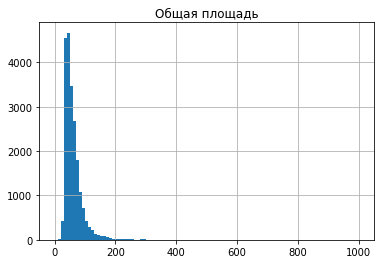

In [49]:
data.hist(column = 'total_area', bins=100, grid = True, range=(0,1000))
plt.title('Общая площадь')
data['total_area'].describe()

Сказать особо нечего: распределение данных нормальное.\
В выборке после предобработки остались квартиры с общей площадью от 14 кв.м. до 900 кв.м., средняя площадь квартир — 60,2 кв.м., медиана — 52 кв.м.\
Значения похожи на реальные, кроме выброса в 900 кв.м.

count    21033.000000
mean        34.544480
std         21.900639
min          8.000000
25%         18.700000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

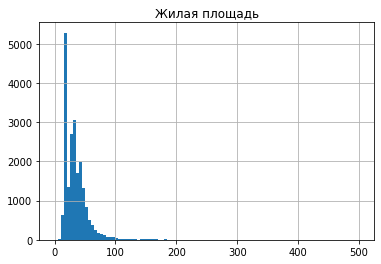

In [50]:
data.hist(column = 'living_area', bins=100, grid = True, range=(0,500))
plt.title('Жилая площадь')
data['living_area'].describe()

Как и в предыдущем пункте, распределение нормальное, отмечаем наличие выброса, но не влияющего на результат.\
Жилая площадь колеблется в диапахоне от 8 кв.м. до 409 кв.м. Средняя жилая площадь квартир — 34,5 кв.м. Медиана — 30 кв.м.\
Значения также вполне реальны, кроме выброса в 409 кв.м.\
Проверим, может быть, оба выброса относятся к одной и той же строке. Если так, мы можем её исправить.

In [51]:
data.loc[data['total_area'] == 900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,publication_day,publication_month,publication_year,floor_category,cityCenters_nearest_km
17350,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106,466666.67,2,12,2017,последний,7


Да, 900 кв.м. общей площади и 409,7 кв.м. жилой площади относятся к одной квартире, но в этой квартире 12 комнат. Почему бы и нет.

count    21033.000000
mean        10.440068
std          5.884502
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

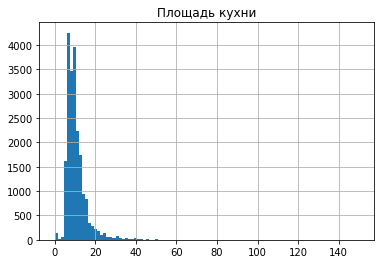

In [52]:
data.hist(column = 'kitchen_area', bins=100, grid = True, range=(0,150))
plt.title('Площадь кухни')
data['kitchen_area'].describe()

Распределение нормальное, есть выброс с площадью кухни 112 кв.м.\
Средний размер кухонь в Санкт-Петербурге составляет 5,8 кв.м., медиана — 9 кв.м.

In [53]:
data['last_price'].describe()

count    2.103300e+04
mean     6.479150e+06
std      9.570456e+06
min      1.219000e+04
25%      3.498000e+06
50%      4.680000e+06
75%      6.790000e+06
max      4.200000e+08
Name: last_price, dtype: float64

Неплохо, но экспоненциальный вид затрудняет анализ.\
Будем считать в тысячах.

In [54]:
data['last_price'] = data['last_price'] / 1000

count     21033.000000
mean       6479.150113
std        9570.455736
min          12.190000
25%        3498.000000
50%        4680.000000
75%        6790.000000
max      420000.000000
Name: last_price, dtype: float64

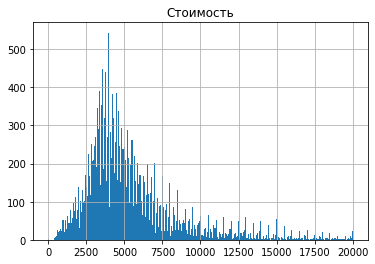

In [55]:
data.hist(column = 'last_price', bins=300, grid = True, range=(0,20000))
plt.title('Стоимость')
data['last_price'].describe()

Наблюдаем нормальное распределение. Минимальная стоимость 12.190 (и это неправдоподобно), максимальная стоимость 420.000.000, средняя стоимость составляет 6.479.150 и медиана 4.680.000. 

count    21033.000000
mean         2.082299
std          1.073837
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

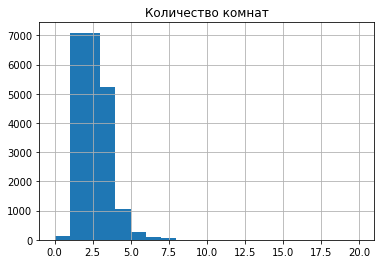

In [56]:
data.hist(column = 'rooms', bins=20, grid = True, range=(0,20))
plt.title('Количество комнат')
data['rooms'].describe()

Количество комнат колеблется от 1 до 19.\
В выборке есть квартиры с 0 комнат — это могут быть как своеобразно внесенные данные о студиях, так и ошибки разного происхождения\
(неправильно внесенные данные, невнесенные данные, ошибки технического характера).

count    13384.000000
mean         2.728579
std          0.275240
min          1.000000
25%          2.500000
50%          2.600000
75%          2.800000
max          4.500000
Name: ceiling_height, dtype: float64

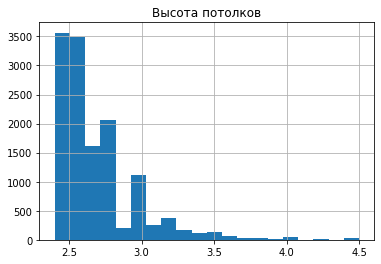

In [57]:
data.hist(column = 'ceiling_height', bins=20, grid = True, range=(2.4,4.5))
plt.title('Высота потолков')
data[data['ceiling_height']!=0]['ceiling_height'].describe()

На этапе предобработки мы уже привели в порядок значения в этом столбце. Оцениваем, что получилось.\
Минимальная высота потолков 2,4м, максимальная — 4,5м, медиана составила 2,6м.

Text(0.5, 1.0, 'Этаж')

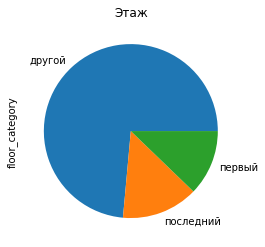

In [58]:
data['floor_category'].value_counts().plot(kind='pie')
plt.title('Этаж')

Солидную часть составляют квартиры, расположенные не на первом и не на последнем этаже. Квартир первого этажа меньше, чем остальных.

count    21033.000000
mean         5.850283
std          4.822326
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

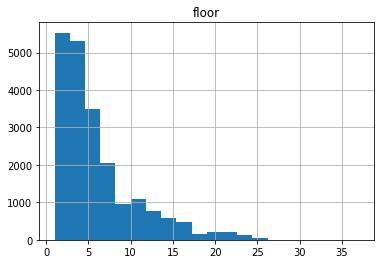

In [59]:
data.hist(column = 'floor', bins=20, grid = True, range=(1,37))
data['floor'].describe()

Основная масса квартир расположена на 1-7 этажах, но есть и варианты выше. Максимальный этаж 30, например.

count    16338.000000
mean     14241.239197
std       8651.780862
min        181.000000
25%       9356.000000
50%      13123.000000
75%      16254.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

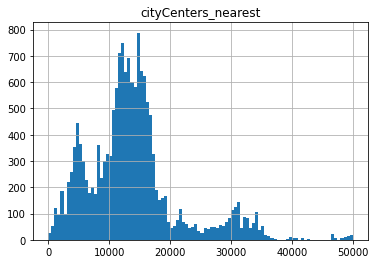

In [60]:
data.hist(column = 'cityCenters_nearest', bins=100, grid = True, range=(0,50000))
data['cityCenters_nearest'].describe()

Если оценивать расстояние до центра в метрах, то у нас есть вариант, расположенный в 181 метре от центра города.\
Однако мы создавали новый столбец с расстоянием до центра в километрах, посмотрим на него.

count    21033.000000
mean        10.677174
std          9.537254
min          0.000000
25%          2.000000
50%         11.000000
75%         15.000000
max         65.000000
Name: cityCenters_nearest_km, dtype: float64

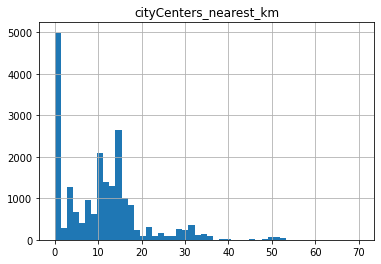

In [61]:
data.hist(column = 'cityCenters_nearest_km', bins=50, grid = True, range=(0,70))
data['cityCenters_nearest_km'].describe()

Минимальное значение лучше видно при рассмотрении данных в метрах, а максимальные удобнее оценивать по километрам.\
Так, у нас есть максимально удаленный вариант — 65 км от центра Санкт-Петербурга. Среднее расстояние составило 9,5 км, а медиана — 11 км.

count    7253.000000
mean      487.958086
std       337.794129
min         1.000000
25%       287.000000
50%       453.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

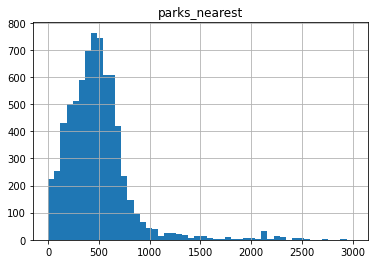

In [62]:
data.hist(column = 'parks_nearest', bins=50, grid = True, range=(0,3000))
data['parks_nearest'].describe()

Минимальное расстояние до парка составляет 1м, максимальное — 3,19км. Среднее расстояние — 337м, медиана — 453м.

## Изучите, как быстро продавались квартиры
* Постройте гистограмму.
* Посчитайте среднее и медиану.
* В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

count    18136.000000
mean       185.122905
std        221.862349
min          1.000000
25%         44.000000
50%        102.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

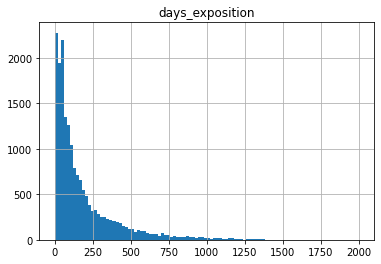

In [63]:
data.hist(column = 'days_exposition', bins=100, grid = True, range=(1,2000))
data[data['days_exposition']!=0]['days_exposition'].describe() #не будем смотреть на нулевые сроки.
#случай покупки квартиры и соответственно снятия объявления в день публикации возможен, но маловероятен, и в таком случае всё равно был бы 1 день.

Распределение Пуассона.\
Среднее значение 192 дня, медиана 107 дней, максимальное значение 1580 дней, то есть 4 года.\
Однако продажа квартир — процесс сложный, и не всегда дата снятия объявления и есть дата продажи квартиры. Кроме того, у Яндекс.Недвижимости своя политика относительно срока публикации объявлений.\
Сроки публикации объявлений о продаже квартир:
* до 4,5 млн — 45 дней
* от 4,5 до 10 млн — 60 дней
* от 10 млн — 90 дней

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

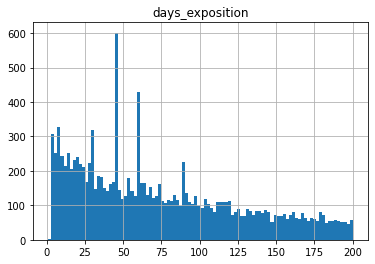

In [64]:
data.hist(column = 'days_exposition', bins=100, grid = True, range=(1,200))

In [65]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45      523
60      344
7       205
30      202
4       161
       ... 
1196      1
1164      1
1148      1
1116      1
1391      1
Name: days_exposition, Length: 1117, dtype: int64

Видим ожидаемые пики на 45, 60 и 90 днях — это и есть работа фильтров Яндекс.Недвижимости, которые сняли объявления как неактуальные,\
а не по причине совершенной сделки.\
Также популярными являются вариант снятия объявления на 7, 30 и 90 день. 30 день вероятно связан с платными объявлениями, а 7 и 90 объяснению не поддаются.\
Стоит уточнить природу этих всплесков снятия объявлений.\
В среднем объявление висит 204 дня.

count    18136.000000
mean       185.122905
std        221.862349
min          1.000000
25%         44.000000
50%        102.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

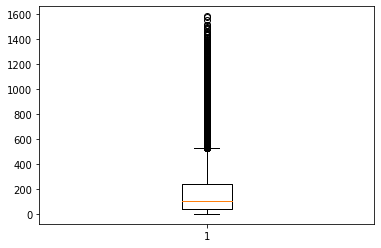

In [66]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
None
data[data['days_exposition']!=0]['days_exposition'].describe()

Межквартильный размах от 42 до 238 дней. Диаграмма размаха дает разброс от 1 до около 500.\
Значения выше 500 будем воспринимать как необоснованно долгие, а от 1 до 500 — как обычный срок продажи квартиры.\
Среднее количество дней публикации составляет 221, медиана 102 дней.

In [67]:
data = data.query('days_exposition != 0 and days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')

count    16726.000000
mean       196.907748
std        227.034496
min          1.000000
25%         46.000000
50%        115.000000
75%        260.000000
max       1580.000000
Name: days_exposition, dtype: float64

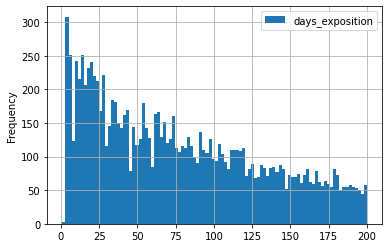

In [68]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
data['days_exposition'].describe()

Снова строим гистограмму в том же масштабе, снова оцениваем данные.\
Средний срок публикации изменился и стал 227 дня, медиана 115 дней.

## Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).\
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

0.6913800394723589

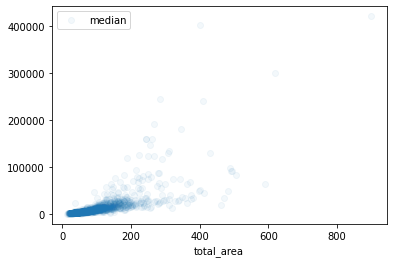

In [69]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median')
pivot_table_total_area.columns = ['median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha=0.05)

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

Коэффициент корреляции Пирсона 0,71 говорит о наличии сильной положительной связи, то есть общая площадь влияет на цену объекта.

0.6046813407733087

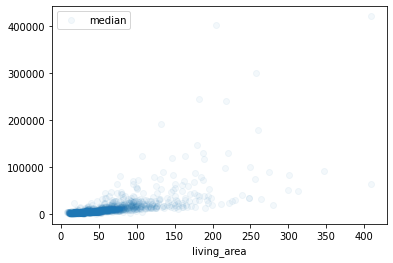

In [70]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'median')
pivot_table_living_area.columns = ['median']
pivot_table_living_area.plot(y = 'median', style = 'o', alpha=0.05)

pivot_table_living_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

Коэффициент корреляции Пирсона 0,61 говорит о наличии сильной положительной связи, то есть жилая площадь влияет на цену объекта.

0.5118645044511675

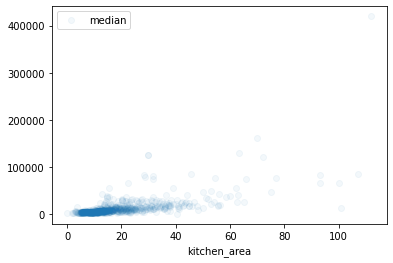

In [71]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'median')
pivot_table_kitchen_area.columns = ['median']
pivot_table_kitchen_area.plot(y = 'median', style = 'o', alpha=0.05)

pivot_table_kitchen_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

Коэффициент корреляции Пирсона 0,53 говорит о наличии умеренной положительной связи, то есть площадь кухни умеренно влияет на цену объекта.\
Однако площадь кухни входит в общую площадь квартиры. 

0.38604136016834933

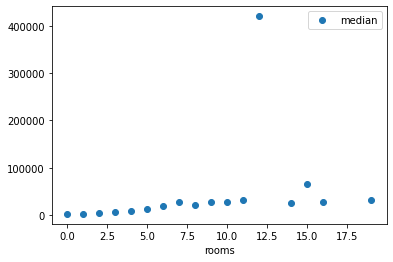

In [72]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
pivot_table_rooms.columns = ['median']
pivot_table_rooms.plot(y = 'median', style = 'o')

pivot_table_rooms.sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

Коэффициент корреляции Пирсона 0,4 говорит о наличии умеренной положительной связи, то есть количество комнат умеренно влияет на цену объекта.

,median
floor_category,
другой,4750.0
первый,3894.5
последний,4300.0


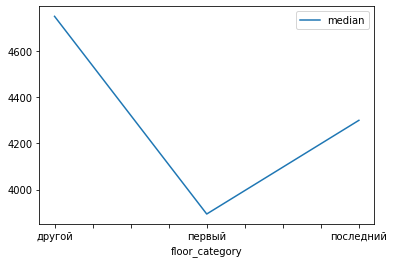

In [73]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'median')
pivot_table_floor_category.columns = ['median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

График показывает очевидный факт: квартиры не на первом и не на последнем этаже дороже. Дешевле всего квартиры на первом этаже.

,median
publication_day,
1,4650.0
3,4650.0
2,4605.0
0,4600.0
4,4500.0
5,4500.0
6,4492.5


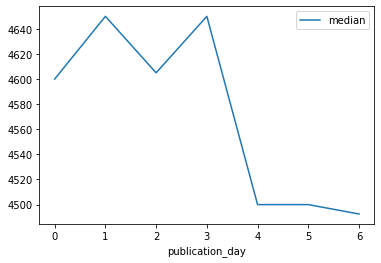

In [74]:
pivot_table_weekday_exposition = data.pivot_table(index = 'publication_day', values = 'last_price', aggfunc = 'median')
pivot_table_weekday_exposition.columns = ['median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

С пятницы по воскресенье выставляют объявления с низкими ценами, а во вторник — с самыми высокими. Разброс невелик, но есть.\
Возможно, он связан с активностью покупателей: в выходные у потенциального покупателя может быть больше времени для выбора,\
вариантов он может просмотреть больше, и варианты с ценой чуть ниже могут быть привлекательными.

,median
publication_month,
9,4700.0
12,4700.0
2,4600.0
11,4600.0
4,4580.0
5,4580.0
1,4575.0
8,4550.0
10,4535.0


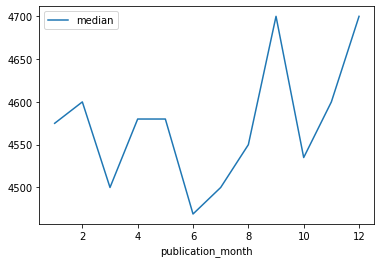

In [75]:
pivot_table_month_exposition = data.pivot_table(index = 'publication_month', values = 'last_price', aggfunc = 'median')
pivot_table_month_exposition.columns = ['median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Разброс невелик, но есть. Цены выше в сентябре и январе. Причин для такой игры на повышение может быть много:
* в сентябре и январе рождаемость выше, чем в другие месяцы, соответственно люди могут продавать квартиры с целью купить квартиру\
  большей площади в связи с рождением ребенка
* в сентябре начинается учебный год у школьников и студентов, и это тоже хороший повод расширить жилплощадь
* купить квартиру в сентябре, чтобы встретить Новый год  в новой квартире и уже с ремонтом (пока идет сделка, пока делается косметический ремонт...)
* купить квартиру в январе, чтобы начать жизнь с чистого листа\
и т.п. причины

Достаточно высокие значения наблюдаем также в мае, и это тоже мы можем связать с рождаемостью и движением детей: ребёнок закончил школу и поступает в университет и большая квартира уже не нужна, но квартира поменьше и/или деньги могут понадобиться.

Спад в июне можно объяснить периодом отпусков: у покупателей больше времени на выбор, поэтому можно привлечь их ценой чуть ниже.

,median
publication_year,
2014,6800.0
2015,5150.0
2019,4750.0
2016,4550.0
2017,4500.0
2018,4500.0


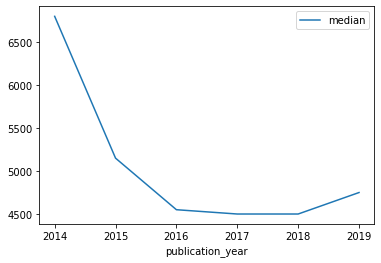

In [76]:
pivot_table_year_exposition = data.pivot_table(index = 'publication_year', values = 'last_price', aggfunc = 'median')
pivot_table_year_exposition.columns = ['median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Наблюдаем резкое снижение цены в 2014-2015 с дальнейшим более плавным снижением до 2018 года и последующим плавным ростом в 2019.\
Вероятно, это связано с экономическим кризисом 2014 года: в нестабильной экономической ситуации мало кто хочет рисковать и ввязываться в такие крупные сделки.

,median
publication_year,
2014,104545.45
2019,104529.62
2018,95782.33
2017,92513.83
2015,91860.47
2016,91113.64


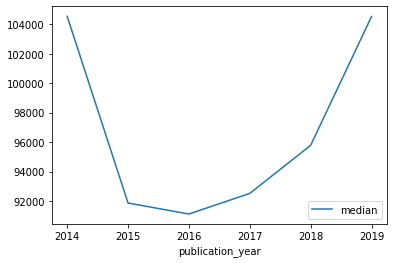

In [77]:
pivot_table_year_exposition = data.pivot_table(index = 'publication_year', values = 'cost_per_sqm', aggfunc = 'median')
pivot_table_year_exposition.columns = ['median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Рассмотрим динамику цен за кв.м. жилой недвижимости за те же года. На графике мы, как и в случае со стоимостью объектов недвижимости, видим спад цены в период 2014-2016 гг., однако далее цена за кв.м. повышается.\
Однако мы помним, что в целом стоимость жилья с 2015 по 2018 год падала.\
Возможно, такое соотношение цен за объект и за кв.м. связано с нарастающей популярностью квартир малого метража, студий, а также апартаментов: их площадь небольшая, но это новостройки, и квадратный метр в них может стоить солидную сумму.

## Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
Постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [78]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'cost_per_sqm', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,11329,111712.512350
Мурино,414,85779.443599
поселок Шушары,332,78063.522380
Кудрово,331,94046.520151
Всеволожск,289,69011.340311
Колпино,264,74935.163371
Пушкин,259,102775.900927
поселок Парголово,237,90444.623713
Гатчина,231,67390.084935


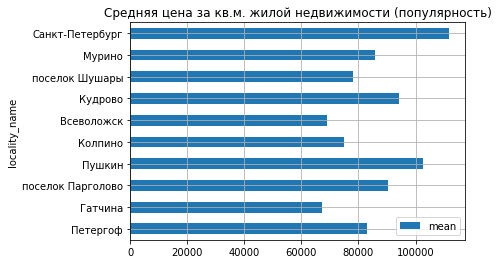

In [79]:
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = True)
locality_pivot_table.plot(y='mean', kind='barh', grid=True)
plt.title('Средняя цена за кв.м. жилой недвижимости (популярность)')
None

На графике наглядно представлено сравнение средних цен за кв.м. жилой недвижимости в десяти самых популярных локациях региона, сверху вниз по популярности представлены локации.

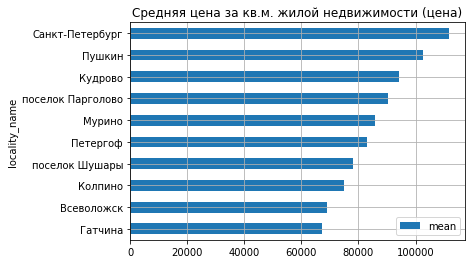

In [80]:
locality_pivot_table = locality_pivot_table.sort_values('mean', ascending = True)
locality_pivot_table.plot(y='mean', kind='barh', grid=True)
plt.title('Средняя цена за кв.м. жилой недвижимости (цена)')
None

Отсортировали значения средней цены. Видим, что Санкт-Петербург на первом месте не только по популярности, но и по цене, а самые дешевые квартиры из десятки самых популярных локаций — в Гатчине.

In [81]:
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()] 

,count,mean
locality_name,,
Санкт-Петербург,11329,111712.51235


Самое дорогой квадратный метр в Санкт-Петербурге.

In [82]:
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Гатчина,231,67390.084935


А самый дешевый из десяти самых популярных населенных пунктов — в Гатчине.

## Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра
Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее.\
Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого\
километра от центра Петербурга.

In [83]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int') #мы уже создавали столбец с расстоянием до центра в километрах

In [84]:
pivot_table_km = data.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
pivot_table_km

,last_price
cityCenters_nearest_km,
0,3476.818839
1,17185.312877
2,16602.638796
3,11573.265050
4,12337.076816
5,14886.295597
6,11858.651731
7,13742.275458
8,7957.373761


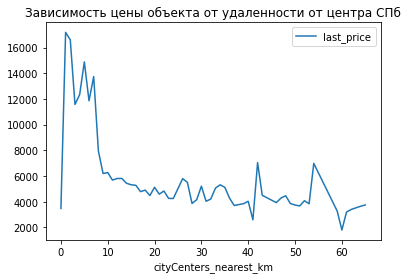

In [85]:
pivot_table_km.plot()
plt.title('Зависимость цены объекта от удаленности от центра СПб')
None

Сложный для анализа график, но всё же мы видим, что он начинается с низкого значения при нулевой близости к центру. Или это выброс, или это какие-нибудь странные апартаменты.\
В целом, чем ближе к центру, тем выше цена, хотя имеются спады, связанные, вероятно, с качеством жилья: старый фонд, квартиры в плохом состоянии, студии и апартаменты, нарезанные из больших коммунальных квартир.\
Наблюдаем резкий спад цены на уровне 8 и 9 км от центра города — это похоже на правду. Центр и районы ближайшие к нему заканчиваются примерно на этом расстоянии, что можно проверить с помощью Яндекс.Карт.\
По мере удаления от центра наблюдаем закономерное снижение цены, при этом имеются пики, которые можем связать с тем, что на удалении от центра расположены другие населенные пункты, которые также могут являться точкой отсчета и популярным местом для жизни, а потому достойным цены выше, чем что-то на отдалении.

Отдельно рассмотрим влияние удаленности от центра на стоимость объекта в границах Санкт-Петербурга.

,last_price
cityCenters_nearest_km,
0,22435.733950
1,17185.312877
2,16602.638796
3,11573.265050
4,12337.076816
5,14886.295597
6,11858.651731
7,13742.275458
8,7957.373761


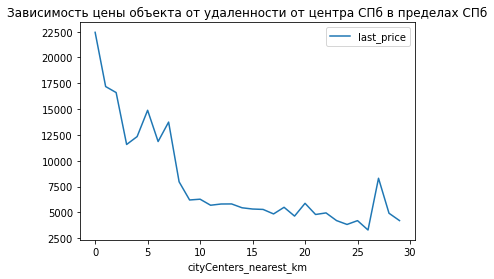

In [86]:
pivot_table_km_spb = data.query('locality_name in "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
pivot_table_km_spb.plot()
plt.title('Зависимость цены объекта от удаленности от центра СПб в пределах СПб')
pivot_table_km_spb

На графике мы видим закономерность: чем объект ближе к центру Санкт-Петербурга, тем он дороже. График стремится вниз по мере удаления от центра, поначалу плавно, до уровня 8-9 км, как и на общем графике, представленном выше, и затем резко снижается с умеренным пиком в самом конце.\
Для получения данного графика мы взяли из общего датасета строки с объектами, обозначенными как объекты из Санкт-Петербурга.\
На всякий случай, уточним размеры Санкт-Петербурга: севера на юг в пределах КАД — 32 км (за пределами КАД — 52 км), с северо-запада на юго-восток за пределами КАД,— около 90 км. В пределах этих значений и лежат наши результаты.\
Объяснить пики на графике довольно просто: районы с жилой недвижимостью с высокой стоимостью расположены на территории Санкт-Петербурга не только в центре, но и географически на окраинах (например, Курортный район Санкт-Петербурга).

## Общий вывод

Для исследования был предоставлен датасет, содержащий информацию об объявлениях о продаже квартир в Санкт-Петербурге и Ленинградской области в период 2014-2019 гг. Часть информации в датасет была внесена пользователями самостоятельно при подаче объявлений, часть — автоматически, с использованием геосервисов.\
`total_images` — число фотографий квартиры в объявлении \
`last_price` — цена на момент снятия с публикации \
`total_area` — общая площадь квартиры в квадратных метрах (м²) \
`first_day_exposition` — дата публикации \
`rooms` — число комнат \
`ceiling_height` — высота потолков (м) \
`floors_total` — всего этажей в доме (float64) \
`living_area` — жилая площадь в квадратных метрах (м²) \
`floor` — этаж \
`is_apartment` — апартаменты \
`studio` — квартира-студия \
`open_plan` — свободная планировка \
`kitchen_area` — площадь кухни в квадратных метрах (м²) \
`balcony` — число балконов \
`locality_name` — название населённого пункта \
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) \
`cityCenters_nearest` — расстояние до центра города (м) \
`parks_around3000` — число парков в радиусе 3 км \
`parks_nearest` — расстояние до ближайшего парка (м) \
`ponds_around3000` — число водоёмов в радиусе 3 км \
`ponds_nearest` — расстояние до ближайшего водоёма (м) \
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)\

На этапе предобработки мы детально рассмотрели предоставленный датасет, обработали пропуски и аномальные значения там, где это возможно, привели данные к корректному типу, пригодному для дальнейших манипуляций.\
Часть аномальных значений в столбцах с высотой потолков и жилой площадью мы обработали с применением дополнительных источников информации (СНиП). 
В ряде случаев мы столкнулись с невосполнимыми пропусками в данных: столбцы с информацией о расстоянии до аэропорта, парков, прудов. В случае решения реальной задачи, мы бы обратились к источнику данных за коррекцией датасета или же уточнением, что делать в такой ситуации и насколько это важно для нашего исследования.
Также мы столкнулись с пользовательской природой пропусков — 38,8% значений в столбце с информацией о высоте потолков были пропущены. Это солидный объем, но восполнить его мы так же не можем, поскольку имеем дело с датасетом с информацией о квартирах в Санкт-Петербурге, где высота потолков не зависит от района, и восполнить такие пропуски доступными нам методами мы не можем, не исказив результат исследования. Поэтому мы заполнили пропуски нулевым значением, чтобы не терять эти строки из датасета и использовать их для анализа других показателей.\
Пропуски в локации объявления были удалены (0,21%), так как у нас нет возможности на данном этапе восстановить эту информацию.

Для дальнейшего анализа мы вывели производные величины:
* цена квадратный метр;
* день недели, месяц и год публикации объявления;
* этаж квартиры (первый, последний, другой);
* расстояние до центра Санкт-Петербурга в км.

Были изучены следующие параметры ообъектов:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка.

В ходе исследования мы выяснили, что:
* Средняя площадь квартир — 60,2 кв.м., медиана — 52 кв.м. Самая маленькая квартира в предоставленной выборке 14 кв.м., а самая большая — двенадцатикомнатная квартира площадью 900 кв.м.
* Жилая площадь колеблется в диапазоне от 8 кв.м. до 409 кв.м (жилая площадь вышеупомянутой двенадцатикомнатной квартиры общей площадью 900 кв.м.). Средняя жилая площадь квартир — 34,5 кв.м. Медиана — 30 кв.м.
* Средний размер кухонь в Санкт-Петербурге составляет 5,8 кв.м., медиана — 9 кв.м.
* Средняя стоимость квартир составляет 6.479.150 и медиана 4.680.000. Самая дорогая квартира стоит 420.000.000.
* Количество комнат в квартирах выборки колеблется от 1 до 19.
* Минимальная высота потолков 2,4м, максимальная — 4,5м, медиана составила 2,6м.
* В выборке подавляющее большинство квартир не первого и не последнего этажа, а какого-либо другого. Меньше всего — квартир первого этажа. 
* Основная масса квартир расположена на 1-7 этажах, но есть и варианты выше. Максимальный этаж 30.
* В выборке есть варианты квартир, расположенные как в центре Санкт-Петербурга (менее 1 км), так и удаленные от него: максимально удаленный вариант — 65 км от центра Санкт-Петербурга. Среднее расстояние составило 9,5 км, а медиана — 11 км.
* Минимальное расстояние до парка составляет 3м, максимальное — 3,19км. Среднее расстояние — 337м, медиана — 453м.

Изучив имеющиеся параметры, мы приступили к выявлению закономерностей, которые позволили бы нам лучше понять состояние рынка жилой недвижимости Санкт-Петербурга.
* Средний срок публикации объявления 227 дня, медиана 115 дней. Самый долгий срок объявления составил 1580 дней (около 4 лет).
В ходе рассмотрения этого параметра мы приняли во внимание, что Яндекс.Недвижимость контролирует сроки публикации объявлений, и очистили выборку от объявлений, снятых автоматически по сроку.
* Общая и жилая площадь сильно влияют на цену объекта; площадь кухни также влияет, но умеренно, и, вероятно, ее влияние опосредованно связано с общим метражом квартиры.
* Количество комнат умеренно влияет на цену квартиры.
* Дешевле всего квартиры на первом этаже. Далее по возрастанию стоимости идут квартиры на последнем этаже и затем на любых других этажах.
* С пятницы по воскресенье выставляют объявления с низкими ценами, а во вторник — с самыми высокими.
* Цены выше в сентябре и январе и ниже в марте и июне.
* В период 2014-2018 гг. цены на квартиры снижались, причем резко в 2014-2015 гг. и далее более плавно; затем, в 2018-2019 гг, наблюдаем плавный рост цен. При этом стоимость кв.м. в период 2014-2015 гг. снижалась, как и стоимость объектов, но затем повышалась.
* Самый дорогой квадратный метр в Санкт-Петербург, а самый дешевый, если выбирать из 10 самых популярных локаций, в Гатчине. При этом Гатчина стоит на девятой строчке по популярности.
Несколько дешевле, чем в Санкт-Петербурге, квартиры в Пушкине, расположенном на седьмом месте по популярности.
* Самые дорогие квартиры в центре Санкт-Петербурга и на расстоянии 8-9 км от него, далее цены заметно снижаются. В соседних населенных пунктах цены на квартиры порой выше, чем на окраинах Санкт-Петербурга.
* При детальном рассмотрении конкретно объектов в Санкт-Петербурге мы видим явную зависимость: чем ближе объект к центру Санкт-Петербурга, тем выше его цена. При этом на достаточном отдалении от центра Санкт-Петербурга находятся районы с ценой несколько выше, чем в близлежащих районах.